# Week 2 - Notes: Mathematical Preliminaries

We need a few things to get us started with making models of classical phenomenon. A few of those topics might be familiar to you; things like vectors, and derivatives. But we'll also need to introduce some new concepts, like the concept of [Discretization](https://en.wikipedia.org/wiki/Discretization). In particular, we will introduce a powerful method for solving all forms of Differential Equations -- Euler-Cromer Integration. We start by introducing the concept of Euler Discretization, and then we'll move on to Euler-Cromer Integration later in the course.

## Euler Discretization

Another useful formulation of Classical Mechanics uses discrete points in time to make approximate predictions of the motion. This is called the [Euler Method](https://en.wikipedia.org/wiki/Euler_method). The Euler Method is a simple numerical method to solve ordinary differential equations. The method is based on the idea of approximating the derivative of a function by a finite difference.

We posit discrete time, like snapshots of the motion where a given measure of time $t_i$ exists in a discrete set of times between $t_0$ and $t_f$. That is, $t_i \in \{t_0, t_1, t_2, \ldots, t_f\}$. We conceive of the motion as discrete like the points in the figure below.

In this case, the points are equally spaced in time, such that $t_{i+1} - t_i = \Delta t$. This gives a simple table of the motion of the object at each time step:

| time | position |
|------|----------|
| $t_0$ | $y_0$ |
| $t_1$ | $y_1$ |
| $t_2$ | $y_2$ |
| $\ldots$ | $\ldots$ |

where $y_i$ is the position of the object at time $t_i$. Here, $t_i = t_0 + i\Delta t$ -- equal time spacing -- and $y(t_i) = y_i$ indicates the position of the object at time $t_i$.

### Predicting the Motion

This formulation can be used to predict the motion of the object.  Let's first define the average velocity over a time step, $\Delta t$, like this:

$$v(t) = \dfrac{y(t+\Delta t) - y(t)}{\Delta t}$$

Now, we know that at time, $t_i$, the velocity is $v_i$: $v(t_i) = v_i$ If we make the time step small, $\Delta t \rightarrow 0$, then the average velocity is approximately the velocity at time $t_i$. Thus, we can write the velocity at time $t_{i}$ as:

$$v_{i} = \dfrac{y_{i+1} - y_i}{\Delta t}$$

**Note** If we take the limit that $\Delta t \rightarrow 0$, then the average velocity becomes the instantaneous velocity. This stems from the [Fundamental Theorem of Calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus).

$$\lim_{\Delta t \rightarrow 0} \dfrac{y(t+\Delta t) - y(t)}{\Delta t} = \dfrac{dy}{dt} = \dot{y}$$

What about the acceleration? We can use the same idea to approximate the acceleration. The average acceleration is given by:

$$a(t) = \dfrac{v(t+\Delta t) - v(t)}{\Delta t}$$

And thus, the acceleration at time $t_i$ is:

$$a_i = \dfrac{v_{i+1} - v_i}{\Delta t}$$

Again, if we take the limit that $\Delta t \rightarrow 0$, then the average acceleration becomes the instantaneous acceleration:

$$\lim_{\Delta t \rightarrow 0} \dfrac{v(t+\Delta t) - v(t)}{\Delta t} = \dfrac{dv}{dt} = \dot{v}$$

### Video Summary (13 minutes)

There's many videos covering the topic of Euler's method. Here's a video that covers the basics of Euler's method and how it can be used to solve differential equations. It somewhat follows the notes above, but it's always good to hear another perspective.

- Direct Link: [https://youtube.com/watch?v=_0mvWedqW7c](https://youtube.com/watch?v=_0mvWedqW7c)

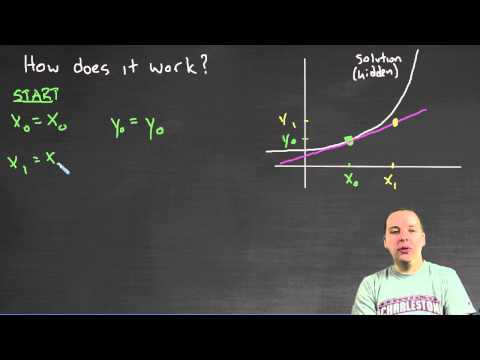

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('_0mvWedqW7c', width=720, height=405)

## Discretizing Newton's Second Law

We can use the Euler Method to discretize Newton's Second Law, and this allows us to predict the motion of the object using iterative methods. These methods are well-suited for computers, and we will learn how to implement them in this course.

Let there be a 1D net force acting the x-direction on an object of mass $m$, $F(x)$. Here the force changes with position. We can discretize this force as a function of position, $F(x_i)$. The net force acting on the object is:

$$F(x_i) = F_i$$

Using Newton's Second Law, we can write the acceleration of the object as:

$$a_i = \dfrac{F_i}{m}$$

But the definition of the average acceleration gives:

$$a_i = \dfrac{v_{i+1} - v_i}{\Delta t}$$

Or in terms of the predicted velocity, $v_{i+1}$:

$$v_{i+1} = v_i + a_i\Delta t$$

Or in terms of the net force:

$$v_{i+1} = v_i + \dfrac{F_i}{m}\Delta t$$

**This is the Euler formulation for predicting the velocity of the object in the next time step -- given the velocity at the current time step.**

We pause here and will return to this formulation later, but this discretization is the basis for many numerical methods in classical mechanics, and we can apply it to solve the falling object problem above.

### Looking Ahead

The development of the forward Euler scheme is the basis for many numerical methods in physics, and especially in classical mechanics. The video below is a longer introduction to the Euler Method and how it can be used to solve differential equations. It's a bit more advanced than the previous video, but it's a good introduction to the topic. We will revisit this topic a number of times, and you will have a chance to implement these methods in Python. *This video will be posted again when we cover numerical methods in more detail.*

- Direct Link: [https://www.youtube.com/watch?v=MstPeOTCVzQ](https://www.youtube.com/watch?v=MstPeOTCVzQ)

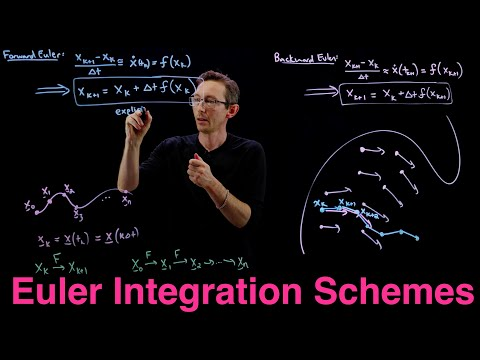

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('MstPeOTCVzQ', width=720, height=405)

## Additional Mathematical Preliminaries

As you have noticed, much of what we do in classical mechanics involves solving differential equations. We will explore how to solve these equations in this course. But also notice that most of the work involves vector manipulation and/or decomposition. Thus, we will need to be comfortable with vectors. Below are some mathematical concepts of vectors that we will use in this course.

### Vectors and Coordinates

The figure below shows a vector in two dimensions. 

![Vector in Two Dimensions; the vector is defined by its magnitude, $A$, and its direction, $\theta$](../images/notes/week2/2dvector.png)

The vector is defined by its magnitude, $A$, and its direction, $\theta$. The vector can be decomposed into two components, $A_x$ and $A_y$, in the $x$ and $y$ directions, respectively.

The magnitude of the vector is given by the Pythagorean theorem:

$$|\vec{A}| = A = \sqrt{A_x^2 + A_y^2}$$

The angle of the vector is given by the tangent of the angle:

$$\theta = \tan^{-1}\left(\dfrac{A_y}{A_x}\right)$$

We can find the *vector components* using the magnitude and angle:

$$A_x = A\cos(\theta)$$
$$A_y = A\sin(\theta)$$

It's important to note that the vector components are the projections of the vector onto the $x$ and $y$ axes. The vector components are scalars, and the vector is a sum of the components. We can write the vector in several common forms:

$$\vec{A} = A_x\hat{x} + A_y\hat{y}  = A_x\hat{i} + A_y\hat{j} = A_x\hat{e}_x + A_y\hat{e}_y.$$

#### Unit Vectors

The unit vectors, $\hat{x}$, $\hat{y}$, $\hat{i}$, $\hat{j}$, $\hat{e}_x$, and $\hat{e}_y$, are the basis vectors in the $x$ and $y$ directions. The unit vectors are used to define the vector components. 

Interestingly, the angle of the vector is not needed to write the vector in Plane Polar Coordinates ($r$, $\theta$). The vector can be written as:

$$\vec{A} = A\hat{A}$$

where $\hat{A}$ is the unit vector in the direction of $\vec{A}$. Let's check that works out:

$$\vec{A} = A_x\hat{x} + A_y\hat{y}$$

$$|\vec{A}| = A = \sqrt{A_x^2 + A_y^2}$$

$$\hat{A} = \dfrac{\vec{A}}{|\vec{A}|} = \dfrac{A_x\hat{x} + A_y\hat{y}}{\sqrt{A_x^2 + A_y^2}}$$

Such that,

$$\vec{A} = A\hat{A} = A_x\hat{x} + A_y\hat{y}$$

Cartesian unit vectors are fixed in space and time when in an inertial reference frame. However, the unit vectors in Plane Polar Coordinates are not fixed in space and time. They rotate with the vector. This is a common source of confusion when working with vectors in different coordinate systems, which we will come back to later.

The magnitude of a unit vector is always one, $|\hat{A}| = 1$. And unit vectors are orthogonal to each other, $\hat{x} \cdot \hat{y} = 0$.


### Multiplication of Vectors

#### Dot (Scalar) Product

A dot product of two vectors is a scalar quantity. The dot product of two 3D vectors, $\vec{a}$ and $\vec{b}$, is given by:

$$\vec{a} \cdot \vec{b} = a_xb_x + a_yb_y + a_zb_z$$

This product is also equal to the product of the magnitudes of the vectors and the cosine of the angle between them:

$$\vec{a} \cdot \vec{b} = |\vec{a}||\vec{b}|\cos(\phi).$$ 

The figure below shows the relationship between the vectors and the angle.

![Dot Product of Two Vectors; the dot product is the product of the magnitudes of the vectors and the cosine of the angle between them](../images/notes/week2/Dot-product.png) 

<br>
Source: [Wikipedia](https://commons.wikimedia.org/wiki/File:Dot-product-1.svg)

Much like scalar multiplication, a dot produce is distributive:

$$\vec{a} \cdot (\vec{b} + \vec{c}) = \vec{a} \cdot \vec{b} + \vec{a} \cdot \vec{c}$$

Here's the proof:

$$\vec{a} \cdot (\vec{b} + \vec{c}) = a_x(b_x + c_x) + a_y(b_y + c_y) + a_z(b_z + c_z)$$

$$= a_xb_x + a_xc_x + a_yb_y + a_yc_y + a_zb_z + a_zc_z$$

$$= \vec{a} \cdot \vec{b} + \vec{a} \cdot \vec{c}$$

#### Cross (Vector) Product

The cross product of two vectors is a vector quantity. The cross product of two 3D vectors, $\vec{a}$ and $\vec{b}$, is given by:

$$\vec{a} \times \vec{b} = \begin{vmatrix} \hat{x} & \hat{y} & \hat{z} \\ a_x & a_y & a_z \\ b_x & b_y & b_z \end{vmatrix}$$

This results in a vector that has the following components:

$$\vec{a} \times \vec{b} = (a_yb_z - a_zb_y)\hat{x} - (a_xb_z-a_zb_x)\hat{y} + (a_xb_y - a_yb_x)\hat{z}$$

A few notes about cross products:

1. $\vec{a} \times \vec{b}$ always produces a vector and never a scalar.
2. $(\vec{a} \times \vec{b})_i$ denotes the $i$-th component of the cross product.
3. $\vec{a} \times \vec{b} \neq \vec{b} \times \vec{a}$; order matters.

What is the relationship between $\vec{a} \times \vec{b}$ and $\vec{a} \cdot \vec{b}$? The right-hand rule gives the direction of the cross product. The magnitude of the cross product is given by:

$$|\vec{a} \times \vec{b}| = |\vec{a}||\vec{b}|\sin(\phi)$$
$$|\vec{b} \times \vec{a}| = |\vec{a}||\vec{b}|\sin(\phi)$$

And thus both magnitudes are the same, however, the directions are opposite. 

$$\vec{a} \times \vec{b} = -\vec{b} \times \vec{a}$$

## Units

In classical mechanics, we will use the [International System of Units (SI)](https://en.wikipedia.org/wiki/International_System_of_Units). The SI units are the standard units used in science and engineering. The primary units we will use in this course are related to the motion of objects:

- **Length**: The meter, $m$, is the standard unit of length, $[r] = \mathrm{length}$.
- **Mass**: The kilogram, $kg$, is the standard unit of mass, $[m] = \mathrm{mass}$.
- **Time**: The second, $s$, is the standard unit of time, $[t] = \mathrm{time}$.


From these basic units, we can derive the other units. We also use velocity, acceleration, force, momentum, and energy. 

- **Velocity**: The meter per second, $m/s$, is the standard unit of velocity, $[v] = \mathrm{length/time}$.
- **Acceleration**: The meter per second squared, $m/s^2$, is the standard unit of acceleration, $[a] = \mathrm{length/time^2}$.
- **Force**: The Newton, $N$, is the standard unit of force, $[F] = \mathrm{mass*length/(time)^2}$.
- **Momentum**: The kilogram meter per second, $kg\cdot m/s$, is the standard unit of momentum, $[p] = \mathrm{mass*length/time}$.
- **Energy**: The Joule, $J$, is the standard unit of energy, $[E] = \mathrm{mass*length}^2/\mathrm{time}^2$.

### Example: What are the units of the drag coefficients?

Recall the drag force, $F_{air} = bv + cv^2$. The units of the drag coefficients, $b$ and $c$, can be found by examining the units of the force. The units of the force are:

$$[F_{air}] = [b][v] + [c][v^2]$$

$$\mathrm{mass*length/(time)^2} = [b]*\mathrm{length/time}+ [c]*(\mathrm{length/(time)})^2$$

The units need to match on both sides of the equation. Thus, the units of the drag coefficients are:

Thus, the units of the drag coefficients are:

$$[b] = \mathrm{mass*length/(time)^2} * \mathrm{time/length} = \mathrm{mass/time}$$

$$[c] = \mathrm{mass*length/(time)^2} * (\mathrm{time/(length)})^2 = \mathrm{mass/length}$$